In [1119]:
import pandas as pd
import torch
import numpy as np

In [1120]:
names = open('names.txt', 'r').read().splitlines()
names[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

We are trying to make new names out of these names

# Basic Tokenization

We will take the names and make them into numbers. Hence each letter will be a number.

In [1121]:
#Getting all the unique letters

letters = sorted(list(set("".join(names) + '.')))

In [1122]:
# Converting the letters to numbers

stoi = {} # Look-up
for ix, letter in enumerate(letters):
    stoi[letter] = ix
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [1207]:
# Converting the numbers back to letters

itos = {}
for key,value in stoi.items():
    itos[value] = key
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

# Making the embedding layer

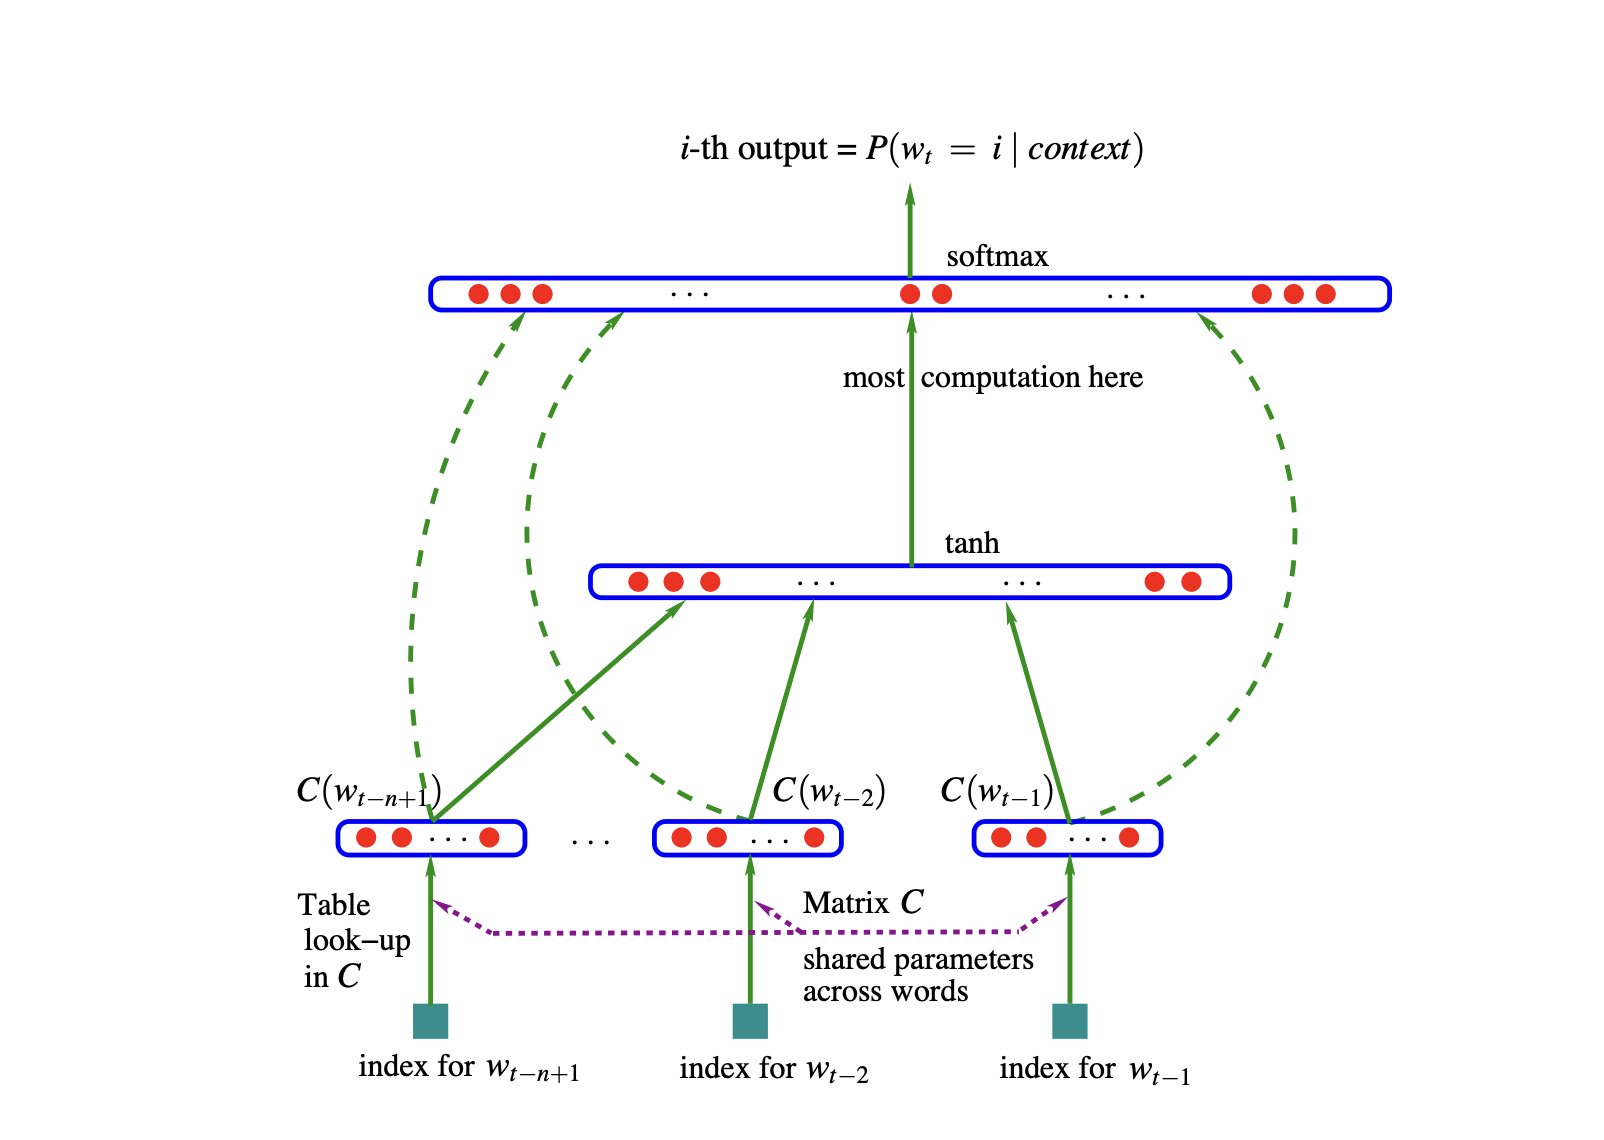

In [1124]:
#Number of words we have

len(names)

32033

In [1125]:
#Number of letters we have

len(letters)

27

### We need 27 rows in the embedding layer with n dimensions

In [1126]:
import torch

dimensions = 2
variables = 27
def getEmbeddings(variables,dimensions):
    g = torch.Generator().manual_seed(2147483647)
    c = torch.randn((variables,dimensions), generator = g)
    return c
c = getEmbeddings(variables, dimensions)
c

tensor([[ 1.5674, -0.2373],
        [-0.0274, -1.1008],
        [ 0.2859, -0.0296],
        [-1.5471,  0.6049],
        [ 0.0791,  0.9046],
        [-0.4713,  0.7868],
        [-0.3284, -0.4330],
        [ 1.3729,  2.9334],
        [ 1.5618, -1.6261],
        [ 0.6772, -0.8404],
        [ 0.9849, -0.1484],
        [-1.4795,  0.4483],
        [-0.0707,  2.4968],
        [ 2.4448, -0.6701],
        [-1.2199,  0.3031],
        [-1.0725,  0.7276],
        [ 0.0511,  1.3095],
        [-0.8022, -0.8504],
        [-1.8068,  1.2523],
        [ 0.1476, -1.0006],
        [-0.5030, -1.0660],
        [ 0.8480,  2.0275],
        [-0.1158, -1.2078],
        [-1.0406, -1.5367],
        [-0.5132,  0.2961],
        [-1.4904, -0.2838],
        [ 0.2569,  0.2130]])

### Each layer corresponds to one letter. Let us consider . -> a

In [1147]:
cn = getEmbeddings(27,2) # Embeddings
W1n, b1n = hidden_layer(100, block_size = 3, dimensions = 2) # Hidden Layer
W2n, b2n = output_layer(100) # Output Layer

In [1148]:
W1n

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9644e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2844e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4040e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0731e-02,
          2.4968e+00,  2.4448e+00, -6.7006e-01, -1.2199e+00,  3.0314e-01,
         -1.0725e+00,  7.2762e-01,  5.1114e-02,  1.3095e+00, -8.0220e-01,
         -8.5042e-01, -1.8068e+00,  1.2523e+00, -1.2256e+00,  1.2165e+00,
         -9.6478e-01, -2.3211e-01, -3.4762e-01,  3.3244e-01, -1.3263e+00,
          1.1224e+00,  5.9641e-01,  4.5846e-01,  5.4011e-02, -1.7400e+00,
          1.1560e-01,  8.0319e-01,  5.4108e-01, -1.1646e+00,  1.4756e-01,
         -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01, -7.8305e-01,
          1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,  9.3743e-01,
         -8.8303e-01,  1.7457e+00,  2.

# Making the Hidden Layer

The hidden layer consists of weights and n_hidden number of nodes. The number of inputs is 27 and outputs are the n_hidden.

In [1145]:
#Let
n_hidden = 100
def hidden_layer(n_hidden,block_size, dimensions):
    g = torch.Generator().manual_seed(2147483647)
    n_inputs = block_size * dimensions
    W1 = torch.randn((n_inputs,n_hidden), generator = g)
    b1 = torch.randn((n_hidden), generator = g)
    
    return W1, b1
W1, b1 = hidden_layer(n_hidden, block_size = 3, dimensions = 2)

In [1146]:
W1

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9644e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2844e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4040e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0731e-02,
          2.4968e+00,  2.4448e+00, -6.7006e-01, -1.2199e+00,  3.0314e-01,
         -1.0725e+00,  7.2762e-01,  5.1114e-02,  1.3095e+00, -8.0220e-01,
         -8.5042e-01, -1.8068e+00,  1.2523e+00, -1.2256e+00,  1.2165e+00,
         -9.6478e-01, -2.3211e-01, -3.4762e-01,  3.3244e-01, -1.3263e+00,
          1.1224e+00,  5.9641e-01,  4.5846e-01,  5.4011e-02, -1.7400e+00,
          1.1560e-01,  8.0319e-01,  5.4108e-01, -1.1646e+00,  1.4756e-01,
         -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01, -7.8305e-01,
          1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,  9.3743e-01,
         -8.8303e-01,  1.7457e+00,  2.

# Making the Output Layer

The final layer consists of weights and n_out number of nodes. The number of inputs is n_hidden and outputs are the 27 as we finally need 27 probablities and we choose one out of them.

In [1128]:
def output_layer(n_hidden):
    g = torch.Generator().manual_seed(2147483647)
    W2 = torch.randn((n_hidden,27), generator = g)
    b2 = torch.randn((27), generator = g)
    
    return W2, b2
W2, b2 = output_layer(n_hidden)

# Setting parameters to have gradients calculated

In [1129]:
parameters = [c, W1, b1, W2, b2]

for parameter in parameters:
    parameter.requires_grad = True

In [1155]:
def getParameters(variables = 27, dimensions = 2, n_hidden = 100, block_size = 3):    
    c = getEmbeddings(variables,dimensions) # Embeddings
    W1, b1 = hidden_layer(n_hidden, block_size = 3, dimensions = 2) # Hidden Layer
    W2, b2 = output_layer(n_hidden) # Output Layer
    c.requires_grad = True
    W1.requires_grad = True
    W2.requires_grad = True
    b1.requires_grad = True
    b2.requires_grad = True
    
    return c, W1,W2,b1,b2

## ----------------------------Finished making the Paramaters----------------------------------
#### Now let us build a forward and backward pass



# Let us first get all the embeddings

Since we have the embeddings already we need to map them to each letter.

In [1131]:
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [1132]:
#Making the context windows and building the dataset. We will use '.' same padding for the context window.

def build_dataset(names):
    block_size = 3
    X, Y = [], []
    for name in names:
        context = [0] * block_size
        for letter in name + '.':
            ix = stoi[letter]
            X.append(context)
            Y.append(ix)

            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

In [1133]:
len(Y), len(Y)

(228146, 228146)

In [1134]:
#Dividing into Training, Validation and Test

import random
random.seed(42)
random.shuffle(names)
n1 = int(0.8 * len(names))
n2 = int(0.9 * len(names))

Xtr, Ytr = build_dataset(names[:n1])
Xdev, Ydev = build_dataset(names[n1:n2])
Xte, Yte = build_dataset(names[n2:])

# Training

In [1135]:
import torch.nn.functional as F
losses = []
epochs = 10000

def Train(X, Y, epochs, batch_size, learning_rate, **kwargs):
    C = kwargs['C']
    W1 = kwargs['W1']
    W2 = kwargs['W2']
    b1 = kwargs['b1']
    b2 = kwargs['b2']
    parameters = [C, W1, W2, b1, b2]
    for _ in range(epochs):
        #Making them mini-batches for batch gradient decent
        batch_size = 32
        ix = torch.randint(0, Xtr.shape[0],(batch_size,), generator = g)
        batch = X[ix]

        #-------------------------------------------Fowrward Pass-------------------------------------------------

        # Getting all the embeddings
        embeddings = C[batch].view(-1,6) # Flattening them out
        # Passing them to the Hidden layer
        # Here X is the embeddings and the W1X + b1 will give the hidden layer output
        hidden_layer_out = embeddings @ W1 + b1
        # Hidden_layer_out is sent through a tanh activation
        activated = hidden_layer_out.tanh()
        #Sending the activated outputs into the output layer
        output = activated @ W2 + b2
        # Finally we get the logits. Now applying softmax to get the probabilities
        probs = F.softmax(output, dim = 1)

        loss = F.cross_entropy(probs, Y[ix])
        losses.append(loss)

        #-------------------------------------------Backward Pass-------------------------------------------------
#         # Setting a learning Rate
#         learning_rate = 0.01

        # Setting all grads to None first
        for parameter in parameters:
            parameter.grad = None
        # Calculating the gradients from loss. - Back prop
        loss.backward()

        for p in parameters:
            if p.grad is not None:
                p.data += -learning_rate * p.grad
        print(f'loss : {loss.item()} , learning_rate : {learning_rate}')
    return ({
            'loss': loss.item(),
            'probs': probs,
            'learning_rate': learning_rate,
            'parameters' : parameters
        })

# Playground to train

### Playing with the learning rate

In [1136]:
# Making new learning rates
epochs = 1000
lre = torch.linspace(-3,0,epochs)
lrs = 10**lre
len(lrs)

1000

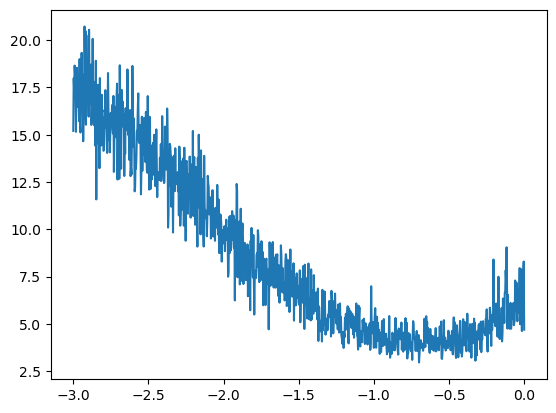

In [1158]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

losses = []
learning_rates = []
    
c = getEmbeddings(variables,dimensions) # Embeddings
W1, b1 = hidden_layer(n_hidden, block_size = 3, dimensions = 2) # Hidden Layer
W2, b2 = output_layer(n_hidden) # Output Layer

parameters = [c, W1, b1, W2, b2]

for parameter in parameters:
    parameter.requires_grad = True




for i in range(1000):
    batch_size = 32
    ix = torch.randint(0, Xtr.shape[0],(batch_size,), generator = g)
    batch = Xtr[ix]

    embeddings = C[batch].view(-1,6)
    hidden_layer_out = embeddings @ W1 + b1
    activated = torch.tanh(hidden_layer_out)
    logits = activated @ W2 + b2

    loss = F.cross_entropy(logits, Ytr[ix])

    learning_rate = lrs[i]
    
    for parameter in parameters:
        parameter.grad = None
    loss.backward()

    for p in parameters:
        if p.grad is not None:
            p.data += -learning_rate * p.grad
#     print(f'loss : {loss.item()} , learning_rate : {learning_rate}')
    losses.append(loss.item())
    learning_rates.append(lre[i].item())

plt.plot(learning_rates, losses)

### We find that learning rate is a bit stable at 1.0 till 0.5. Hence 0.1 will give a good learning rate.

In [1184]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


losses = []
learning_rates = []

C = getEmbeddings(27,2) # Embeddings
W1, b1 = hidden_layer(100, block_size = 3, dimensions = 2) # Hidden Layer
W2, b2 = output_layer(n_hidden = 100) # Output Layer

parameters = [c, W1, b1, W2, b2]

for parameter in parameters:
    parameter.requires_grad = True

for i in range(20000):
    batch_size = 32
    ix = torch.randint(0, Xtr.shape[0],(batch_size,), generator = g)
    batch = Xtr[ix]

    embeddings = C[batch].view(-1,6)
    hidden_layer_out = embeddings @ W1 + b1
    activated = torch.tanh(hidden_layer_out)
    logits = activated @ W2 + b2

    loss = F.cross_entropy(logits, Ytr[ix])

    learning_rate = 0.1 if learning
    
    for parameter in parameters:
        parameter.grad = None
    loss.backward()

    for p in parameters:
        if p.grad is not None:
            p.data += -learning_rate * p.grad
print(f'loss : {loss.item()} , learning_rate : {learning_rate}')
#     losses.append(loss.item())
#     learning_rates.append(lre[i].item())

# plt.plot(learning_rates, losses)

loss : 2.205681085586548 , learning_rate : 0.01


In [1292]:
losses = []
learning_rates = []
stepi = []

### Increasing dimensions

In [1293]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt




C = getEmbeddings(27,10) # Embeddings
W1, b1 = hidden_layer(200, block_size = 3, dimensions = 10) # Hidden Layer
W2, b2 = output_layer(n_hidden = 200) # Output Layer

parameters = [C, W1, b1, W2, b2]

for parameter in parameters:
    parameter.requires_grad = True

for i in range(200000):
    batch_size = 32
    ix = torch.randint(0, Xtr.shape[0],(batch_size,), generator = g)
    batch = Xtr[ix]

    embeddings = C[batch].view(-1,30)
    hidden_layer_out = embeddings @ W1 + b1
    activated = torch.tanh(hidden_layer_out)
    logits = activated @ W2 + b2

    loss = F.cross_entropy(logits, Ytr[ix])

    learning_rate = 0.1 if i<100000 else 0.01
    
    for parameter in parameters:
        parameter.grad = None
    loss.backward()

    for p in parameters:
        if p.grad is not None:
            p.data += -learning_rate * p.grad

    losses.append(loss.log10().item())
    stepi.append(i)
#     learning_rates.append(lre[i].item())
print(f'loss : {loss.item()} , learning_rate : {learning_rate}')


loss : 2.709505319595337 , learning_rate : 0.01


In [1274]:
sum(p.nelement() for p in parameters)

11897

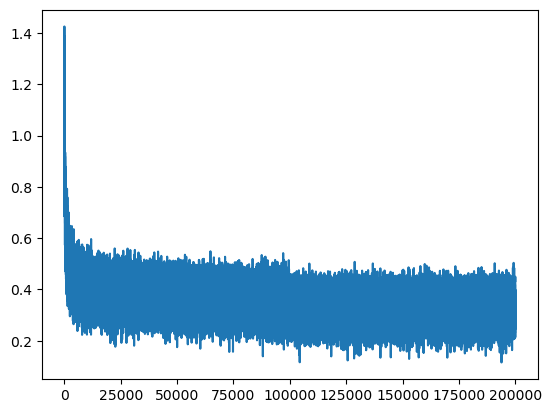

In [1294]:
plt.plot(stepi, losses)

# -------------------------------Training Completed-------------------------------

# Using the Validation Split  - Generally used to train the HyperParameters.

The hyperparameters we have are:</br>
-> dimensions :- Number of dimensions</br>
-> n_hidden :- Number of hidden layers</br>
-> block_size :- Context window size </br>
-> batch_size :- batch size of the training set</br>
-> learning_rate :- Learning rate of the model after back propogation</br>

In [1186]:
epoch = 0

In [1295]:



# Getting all the embeddings
embeddings = C[Xdev].view(-1,30) # Flattening them out
# Passing them to the Hidden layer
# Here X is the embeddings and the W1X + b1 will give the hidden layer output
hidden_layer_out = embeddings @ W1 + b1
# Hidden_layer_out is sent through a tanh activation
activated = hidden_layer_out.tanh()
#Sending the activated outputs into the output layer
logits = activated @ W2 + b2
    
loss = F.cross_entropy(logits, Ydev)

print(f'loss = {loss}')
    


loss = 2.1696341037750244


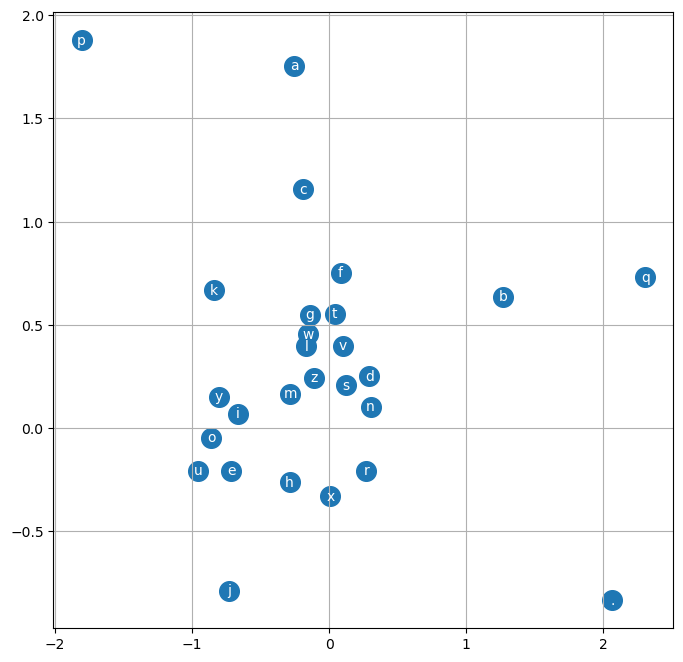

In [1296]:
# Visualizing the embeddings -  !!! Use this with only dimensions = 2
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))  # Changed from (0,0) to reasonable size
plt.scatter(C[:,0].data, C[:,1].data, s=200)  # Fixed c to C
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')
plt.show()  # Added to display the plot

# Sampling from the model

In [ ]:
# Passingg them to the Hidden layer
# Here X is the embeddings and the W1X + b1 will give the hidden layer output
hidden_layer_out = embeddings @ W1 + b1
# Hidden_layer_out is sent through a tanh activation
activated = hidden_layer_out.tanh()
#Sending the activated outputs into the output layer
logits = activated @ W2 + b2
# Getting the probabilities
probs = F.softmax(logits)
        
ix = F.multinomial(probs)

In [1324]:
g = torch.Generator().manual_seed(2147483647)
block_size = 3
    
for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        # Getting all the embeddings
        embeddings = C[torch.tensor([context])].view(-1,30) # Flattening them out
        # Passingg them to the Hidden layer
        # Here X is the embeddings and the W1X + b1 will give the hidden layer output
        hidden_layer_out = embeddings @ W1 + b1
        # Hidden_layer_out is sent through a tanh activation
        activated = hidden_layer_out.tanh()
        #Sending the activated outputs into the output layer
        logits = activated @ W2 + b2
        # Getting the probabilities
        probs = F.softmax(logits)

        ix = torch.multinomial(probs,num_samples = 1).item()
        context = context[1:] + [ix]
        out.append(ix)

        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

journa.
nodrick.
rhulma.
vion.
eoann.
homari.
evanin.
khayah.
kyeo.
kayley.
anley.
jaxeancy.
caziah.
issayyon.
bereni.
dam.
aelaita.
kalliea.
peut.
eny.


/var/folders/gf/51w2p72576n7p6p7d8v1mp_00000gn/T/ipykernel_19876/3232329014.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(logits)
